## Topic: Z-Score Scalling

### OUTCOMES

- 1. Introduction of z-score scalling.

- 2. Code Implementation of Z-score salling.

### 1. Introduction of z-score scalling.

- Definiton:

    - Mean value of each data points is zero.
    - Standard Derivation for each data points are 1.


- formual:
    z_score = (xi - mean)/standard derivation


- Where it's very usefull(what kind of data usally use)?
    - if datatset are uniform distribution.
    - clean, outliers free.


- Limitatoin:
    - z_score dependance on mean and mean is outliers sensitive.

    - so, if the dataset contain outliers then it can't be provide accurate result.


### 2. Code Implementation of Z-score salling.

In [2]:
# import libaries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [4]:
# for suitable or uniform distribution dataset

df = pd.DataFrame({'Height(cm)': [150, 160, 170, 180, 190],
                'Weight(Kg)': [50, 60, 70, 80, 90]
                })

df

,Height(cm),Weight(Kg)
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [ ]:
# find z_score scalling 
# formula: z = (xi - mean)/std

mean = df.mean()

st = df.std()

print(f"Means: {mean.round(2)}")
print(f"\nStd: {st.round(2)}")

Means: Height(cm)    170.0
Weight(Kg)     70.0
dtype: float64

Std: Height(cm)    15.81
Weight(Kg)    15.81
dtype: float64


- What Happen and Decision for above code?

- Happen_
    - Height featues mean is bigger than Weight.
    - Height and Weight featues std are same.

- Decision:
    - Height featues data(values) is bigger than Weight featues data.

    - Two featues are symmetric values or (mean to each data distance are same for two featues)

In [11]:
# Apply z_score

z_score = (df - mean)/st

z_score


,Height(cm),Weight(Kg)
0,-1.264911,-1.264911
1,-0.632456,-0.632456
2,0.000000,0.000000
3,0.632456,0.632456
4,1.264911,1.264911


- Happen?
    - convert Height and Weight featues into a range (0-1)

- Decision?
    - The data are Ready to lean model (without misleading data)

### ploat for after z_score values

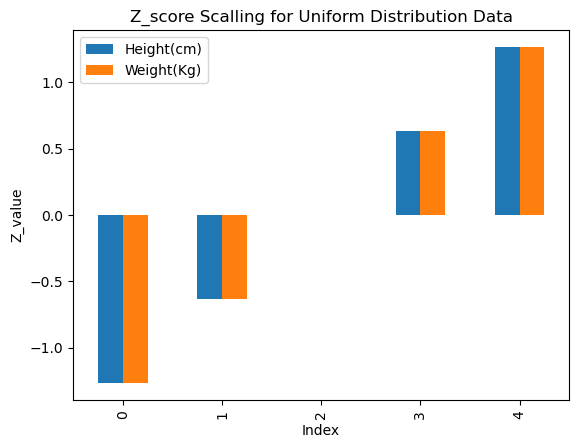

In [69]:

z_score.plot(kind = 'bar')

plt.title("Z_score Scalling for Uniform Distribution Data")

plt.xlabel("Index"); plt.ylabel("Z_value")

plt.show()

### Z_Score for Real-world dataset

In [14]:
# load dataset

df = pd.read_csv('Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [21]:
# to see the preview and size of dataset
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
# size of dataset
df.shape

(10, 4)

- Decision:
    - here total row or data = 10
    - some of data are missing
    - our interesting features (Age, Salary)

In [ ]:
# To identify and handle the missing value in our interesting column

age_nan = df['Age'].isnull().sum()

salary_nan = df['Salary'].isnull().sum()


print("Total Nan value is Age column: ", age_nan)
print("Total Nan value is Salary column: ", salary_nan)


Total Nan value is Age column:  1
Total Nan value is Salary column:  1


In [ ]:
# To see the nan value in total dataset
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

- There are two to Handle of the missing value 
    - dropna [- Deleted the Nan value]
    - fillna [- fill the Nan value]

In [30]:
# fill NaN value with mean value

# Age column
df['Age'].fillna(df['Age'].mean(), inplace = True)

# Salary
df['Salary'].fillna(df['Salary'].mean(), inplace = True)

print("\nAfter Handling the Nan value the DataFame: \n")
df


After Handling the Nan value the DataFame: 



C:\Users\HP\AppData\Local\Temp\ipykernel_1280\350449256.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1280\350449256.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


### Apply Z-score scaling 

In [51]:
# formual: z-score = (xi - mean)/std

# find the mean values

mean_age = df['Age'].mean()
mean_salary = df['Salary'].mean()

print("Mean of age: ", mean_age.round(2))
print("Mean of Salary: ", mean_salary.round(2))

Mean of age:  38.78
Mean of Salary:  63777.78


In [58]:
# find the standard dev

std_age = df['Age'].std()
std_salary = df['Salary'].std()

print(f"\nSTD of age: {std_age:.3f}")
print(f"STD of Salary:{std_salary:.3f} ")



STD of age: 7.254
STD of Salary:11564.099 


In [59]:
# z-score for Age column (z-score = (xi - mean)/std)
df["z_score_age"] = (df['Age'] - mean_age)/ std_age

# z-score for Salary column (z-score = (xi - mean)/std)
df["z_score_salary"] = (df['Salary'] - mean_salary)/ std_salary

df


,Country,Age,Salary,Purchased,z_score_age,z_score_salary
0,France,44.000000,72000.000000,No,0.719931,7.110128e-01
1,Spain,27.000000,48000.000000,Yes,-1.623675,-1.364376e+00
2,Germany,30.000000,54000.000000,No,-1.210098,-8.455287e-01
3,Spain,38.000000,61000.000000,No,-0.107224,-2.402070e-01
4,Germany,40.000000,63777.777778,Yes,0.168495,6.291850e-16
5,France,35.000000,58000.000000,Yes,-0.520801,-4.996306e-01
6,Spain,38.777778,52000.000000,No,0.000000,-1.018478e+00
7,France,48.000000,79000.000000,Yes,1.271368,1.316334e+00
8,Germany,50.000000,83000.000000,No,1.547087,1.662233e+00
9,France,37.000000,67000.000000,Yes,-0.245083,2.786401e-01


#### Note: 

- here sum of std should be = 1 in z_score value

- here, mean of z-score value is = 0.



In [ ]:
# stdandard derivation
print(df['z_score_age'].std())

print(df['z_score_salary'].std())

1.0
1.0


In [67]:
# mean of z-score 

print(df['z_score_age'].mean())

print(df['z_score_salary'].mean())


-7.771561172376095e-17
3.774758283725532e-16


### plot Z_score for real data